In [1]:

from rdkit import Chem
from rdkit.Chem import AllChem,PandasTools, Descriptors, Draw
from rdkit.Chem import MACCSkeys
from rdkit import DataStructs
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from rdkit.Chem import MACCSkeys
import rdkit.Chem.Descriptors as Descriptors
import torch.nn as nn
import torch
from sklearn.metrics import roc_curve, accuracy_score, roc_auc_score
import pandas as pd

ModuleNotFoundError: No module named 'rdkit'

In [2]:
df = pd.read_csv("data/new.csv", names=["Name","year","compound", "Smiles"], header=None,sep=";")
df

NameError: name 'pd' is not defined

In [3]:
df.columns

NameError: name 'df' is not defined

In [4]:
smiles = df.Smiles.tolist() # convert to list
names = df.Name.tolist() # convert to list

print(smiles[0], names[0])# print first smiles and name

NameError: name 'df' is not defined

In [5]:
molecules = [Chem.MolFromSmiles(s) for s in smiles]# convert smiles to molecules
Draw.MolsToGridImage(molecules, legends=names)# draw molecules

NameError: name 'smiles' is not defined

In [6]:

# Convert SMILES to RDKit Molecule objects
molecules = [Chem.MolFromSmiles(s) for s in smiles]

# Calculate MACCS Keys fingerprints
maccs_fingerprints = [MACCSkeys.GenMACCSKeys(mol) for mol in molecules]


NameError: name 'smiles' is not defined

In [7]:
# Create a similarity table
maccs_table = pd.DataFrame(index=names, columns=names)

for i in range(len(molecules)):
    for j in range(len(molecules)):
        if molecules[i] is not None and molecules[j] is not None:
            fp1 = MACCSkeys.GenMACCSKeys(molecules[i])
            fp2 = MACCSkeys.GenMACCSKeys(molecules[j])
            dice_similarity = DataStructs.DiceSimilarity(fp1, fp2)
            maccs_table.loc[names[i], names[j]] = dice_similarity

print(maccs_table)

NameError: name 'pd' is not defined

In [8]:
df['Molecule'] = df['Smiles'].apply(Chem.MolFromSmiles)

# Calculate molecular descriptors
df['Mw'] = df['Molecule'].apply(Descriptors.MolWt)            # Molecular weight
df['HBA'] = df['Molecule'].apply(Descriptors.NumHAcceptors)   # Hydrogen bond acceptors
df['HBD'] = df['Molecule'].apply(Descriptors.NumHDonors)      # Hydrogen bond donors
df['LogP'] = df['Molecule'].apply(Descriptors.MolLogP)        # LogP

# Drop Molecule column if not needed
df.drop(columns=['Molecule'], inplace=True)

# Display the updated DataFrame
print(df)

NameError: name 'df' is not defined

In [9]:

# Function to calculate Lipinski's Rule of Five compliance
def filter_lipinski(molecules):
    filtered_molecules = []  # List to store molecules that pass the rule
    for mol in molecules:
        if mol is not None:  # Ensure the molecule is valid
            if (
                Descriptors.NumHAcceptors(mol) <= 10 and
                Descriptors.NumHDonors(mol) <= 5 and
                Descriptors.MolWt(mol) <= 500 and
                Descriptors.MolLogP(mol) <= 5
            ):
                filtered_molecules.append(mol)
    return filtered_molecules
filtered_molecules=filter_lipinski(molecules)
print(len(filtered_molecules))

4


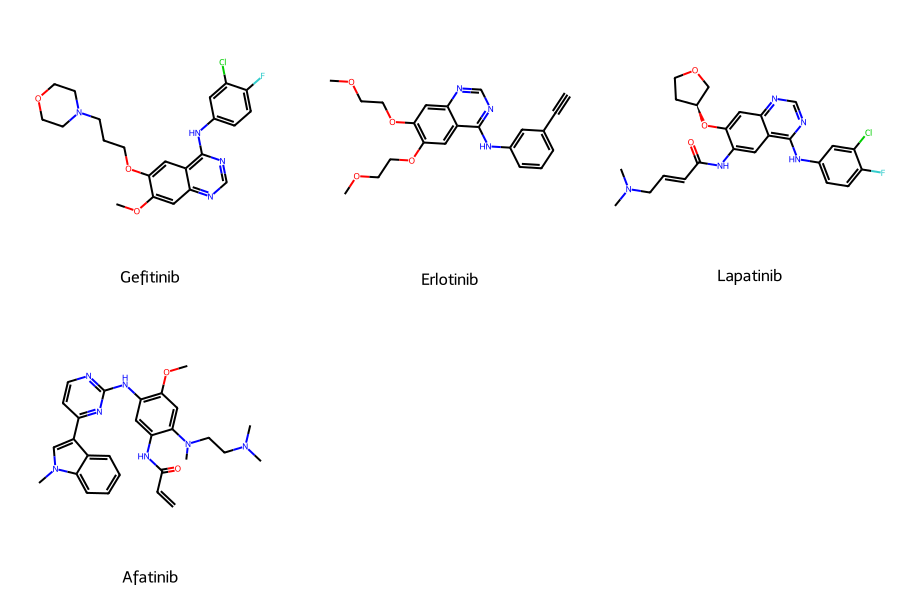

In [10]:

# Visualize the molecules in a grid
img = Draw.MolsToGridImage(
    filtered_molecules,
    legends=df['Name'].tolist(),  # Use molecule names as legends
    molsPerRow=3,                 # Number of molecules per row
    subImgSize=(300, 300)         # Size of each molecule image
)

# Display the image
img

In [11]:
df = pd.read_csv("data/CHEMBL25_activities_EGFR.csv")
df.head()

,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50
0,1777,CHEMBL207869,77.0,nM,Fc1cccc(COc2ccc(Nc3ncncc3C#Cc4ncccn4)cc2Cl)c1,7.113509
1,5785,CHEMBL3940060,330.0,nM,Fc1ccc(Nc2ncnc3cc4OC(=O)N(CCOC(=O)CCl)c4cc23)c...,6.481486
2,6373,CHEMBL3678951,1.0,nM,CC(C)n1c(Nc2cccc(c2)C(F)(F)F)nc3cnc(Nc4ccc(cc4...,9.000000
3,2442,CHEMBL504034,40.0,nM,CS(=O)(=O)CCNC(=O)O[C@H]1CN[C@@H](C1)C#Cc2cc3n...,7.397940
4,1084,CHEMBL158797,43000.0,nM,Cn1c(SSc2c(C(=O)NCC(O)CO)c3ccccc3n2C)c(C(=O)NC...,4.366532


In [12]:
df_actives = df[df['pIC50'] < 6.3]#sorting the actives
df_actives.head()

,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50
4,1084,CHEMBL158797,43000.0,nM,Cn1c(SSc2c(C(=O)NCC(O)CO)c3ccccc3n2C)c(C(=O)NC...,4.366532
10,3047,CHEMBL591706,32120.0,nM,CCCCN(Cc1cccc(Cl)c1O)C(=O)Nc2ccccc2,4.493224
15,91,CHEMBL78150,460000.0,nM,CC(C)(C)c1cc(C=C(C#N)C#N)cc(c1O)C(C)(C)C,3.337242
16,3342,CHEMBL1241948,100000.0,nM,CC(C)n1nc(c2cccc(NS(=O)(=O)C)c2)c3c(N)ncnc13,4.000000
17,4864,CHEMBL3233765,3399.0,nM,CN1CCN(CC(=O)Nc2cc3c(Nc4ccc(F)c(Cl)c4)ncnc3s2)CC1,5.468649


In [13]:
df_inactives = df[df['pIC50'] >= 6.3]#sorting the inactives
df_inactives.head()

,Unnamed: 0,chembl_id,IC50,units,canonical_smiles,pIC50
0,1777,CHEMBL207869,77.0,nM,Fc1cccc(COc2ccc(Nc3ncncc3C#Cc4ncccn4)cc2Cl)c1,7.113509
1,5785,CHEMBL3940060,330.0,nM,Fc1ccc(Nc2ncnc3cc4OC(=O)N(CCOC(=O)CCl)c4cc23)c...,6.481486
2,6373,CHEMBL3678951,1.0,nM,CC(C)n1c(Nc2cccc(c2)C(F)(F)F)nc3cnc(Nc4ccc(cc4...,9.000000
3,2442,CHEMBL504034,40.0,nM,CS(=O)(=O)CCNC(=O)O[C@H]1CN[C@@H](C1)C#Cc2cc3n...,7.397940
5,6596,CHEMBL4069003,3.0,nM,NP(=O)(OCCCOc1ccc2ncnc(Nc3cccc(Br)c3)c2c1)N(CC...,8.522879


In [14]:
smiles_active = df_actives["canonical_smiles"].tolist()
smiles_inactive = df_inactives["canonical_smiles"].tolist()

In [15]:
#maccs fingerprints
fingerprintsmaccs_active = []
fingerprintsmaccs_inactive = []

for smiles in smiles_active: 
    molecule = Chem.MolFromSmiles(smiles)
    fingerprintsmaccs_active.append(MACCSkeys.GenMACCSKeys(molecule))

for smiles in smiles_inactive:
    molecule = Chem.MolFromSmiles(smiles)
    fingerprintsmaccs_inactive.append(MACCSkeys.GenMACCSKeys(molecule))

In [16]:
# Combine fingerprints and labels
fps = fingerprintsmaccs_active + fingerprintsmaccs_inactive  # Feature vectors
y = [1] * len(fingerprintsmaccs_active) + [0] * len(fingerprintsmaccs_inactive)  # Labels

# Convert to PyTorch tensors
X = torch.tensor(fps, dtype=torch.float32)  # Features
y = torch.tensor(y, dtype=torch.float32).view(-1, 1)  # Labels (reshaped to (N, 1))

In [17]:
from sklearn.model_selection import train_test_split
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

In [18]:

class SimpleNN(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)  # Input layer
        self.fc2 = nn.Linear(hidden_size, hidden_size) # Hidden layer
        self.fc3 = nn.Linear(hidden_size, output_size) # Output layer

    def forward(self, x):
        x = torch.relu(self.fc1(x))  # Activation function
        x = torch.relu(self.fc2(x))  # Activation function
        x = torch.sigmoid(self.fc3(x))  # Sigmoid for binary classification
        return x

In [19]:
input_size = len(fps[0])  # Number of features (MACCS fingerprint bits)
hidden_size = 128         # Number of neurons in hidden layers
output_size = 1           # Binary classification (active/inactive)

model = SimpleNN(input_size, hidden_size, output_size)

In [20]:
criterion = nn.BCELoss()  # Binary Cross-Entropy Loss
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)  # Adam optimizer

In [21]:
num_epochs = 20
for epoch in range(num_epochs):
    model.train()  # Set model to training mode
    optimizer.zero_grad()  # Clear gradients

    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss every few epochs
    if (epoch + 1) % 5 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [5/20], Loss: 0.6614
Epoch [10/20], Loss: 0.6294
Epoch [15/20], Loss: 0.5875
Epoch [20/20], Loss: 0.5474


In [22]:
model.eval()  # Set model to evaluation mode
with torch.no_grad():
    y_pred = model(X_test)
    y_pred = (y_pred > 0.5).float()  # Convert probabilities to binary predictions
    accuracy = (y_pred == y_test).float().mean()
    print(f'Test Accuracy: {accuracy.item() * 100:.2f}%')

Test Accuracy: 74.81%


In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Convert PyTorch tensors to numpy arrays for Random Forest
X_train_np = X_train.numpy()
X_test_np = X_test.numpy()
y_train_np = y_train.numpy().ravel()
y_test_np = y_test.numpy().ravel()

In [24]:
# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=1234, max_features=100,n_jobs=-1)
rf_model.fit(X_train_np, y_train_np)

RandomForestClassifier(max_features=100, n_jobs=-1, random_state=1234)

In [25]:
y_pred_rf = rf_model.predict(X_test_np)
y_pred_rf[:10]

array([1., 0., 1., 1., 1., 1., 1., 0., 1., 1.], dtype=float32)

In [26]:
y_prob_rf=rf_model.predict_proba(X_test)
y_prob_rf[:10]

array([[0.47333333, 0.52666667],
       [0.655     , 0.345     ],
       [0.2       , 0.8       ],
       [0.05      , 0.95      ],
       [0.39383333, 0.60616667],
       [0.        , 1.        ],
       [0.01      , 0.99      ],
       [0.90916667, 0.09083333],
       [0.195     , 0.805     ],
       [0.24833333, 0.75166667]])

In [27]:
# Calculate accuracy and classification report
rf_accuracy = accuracy_score(y_test_np, y_pred_rf)
rf_classification_report = classification_report(y_test_np, y_pred_rf)

print(f"Random Forest Test Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report:\n", rf_classification_report)

Random Forest Test Accuracy: 85.55%

Classification Report:
               precision    recall  f1-score   support

         0.0       0.86      0.90      0.88       459
         1.0       0.84      0.80      0.82       323

    accuracy                           0.86       782
   macro avg       0.85      0.85      0.85       782
weighted avg       0.86      0.86      0.85       782



In [28]:
from sklearn.metrics import roc_curve, roc_auc_score

# Neural Network: Calculate probabilities and AUC
with torch.no_grad():
    y_prob_nn = model(X_test).numpy()  # Get probabilities from the neural network

nn_auc = roc_auc_score(y_test_np, y_prob_nn)  # Calculate AUC for neural network
fpr_nn, tpr_nn, _ = roc_curve(y_test_np, y_prob_nn)  # Calculate ROC for neural network


In [29]:
# Random Forest: Calculate probabilities and AUC
y_prob_rf = rf_model.predict_proba(X_test_np)[:, 1]  # Probabilities for class 1 (active)

rf_auc = roc_auc_score(y_test_np, y_prob_rf)  # Calculate AUC for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test_np, y_prob_rf)  # Calculate ROC for Random Forest


/var/folders/ts/vqxzv1017qb02q48zs_jkpch0000gn/T/ipykernel_3504/3513021375.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier", color='black')  # Random baseline


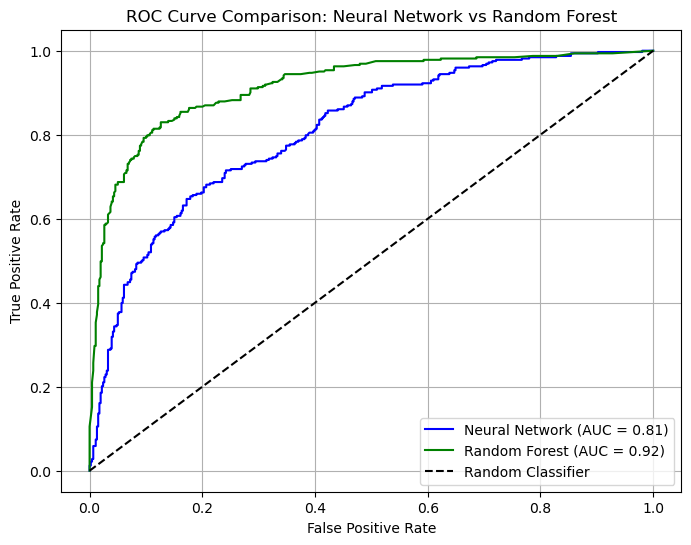

In [30]:
# Plot the ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_nn, tpr_nn, label=f'Neural Network (AUC = {nn_auc:.2f})', color='blue')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_auc:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label="Random Classifier", color='black')  # Random baseline

# Add labels and legend
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison: Neural Network vs Random Forest')
plt.legend()
plt.grid()
plt.show()


In [31]:
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)
skf.get_n_splits(fps, y)

5

In [32]:


# DataFrame to store results
dataFrames = pd.DataFrame(columns=["Accuracy", "AUC", "Sensitivity", "Specificity"])
accu = []
sensit = []
specifi = []
aucList = []
models = []

# Perform Stratified K-Fold Cross-Validation
for train_index, test_index in skf.split(X.numpy(), y.numpy().ravel()):
    # Split the data
    X_train, X_test = X.numpy()[train_index], X.numpy()[test_index]
    y_train, y_test = y.numpy().ravel()[train_index], y.numpy().ravel()[test_index]
    
    # Train the Random Forest model
    rf_model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = rf_model.predict(X_test)
    y_prob = rf_model.predict_proba(X_test)[:, 1]  # Probabilities for class 1
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    
    # Sensitivity (True Positive Rate) and Specificity (1 - False Positive Rate)
    sensitivity = tpr[1] if len(tpr) > 1 else 0  # Avoid index error if tpr has only one value
    specificity = 1 - fpr[1] if len(fpr) > 1 else 0
    
    # Store metrics
    accu.append(accuracy)
    aucList.append(roc_auc)
    sensit.append(sensitivity)
    specifi.append(specificity)
    models.append(rf_model)
    dataFrames.loc[len(dataFrames)] = [accuracy, roc_auc, sensitivity, specificity]

# Calculate and display the final DataFrame
print(dataFrames)


   Accuracy       AUC  Sensitivity  Specificity
0  0.832481  0.894028     0.126844     0.997743
1  0.839949  0.896335     0.117994     0.997738
2  0.819462  0.877793     0.106509     1.000000
3  0.838668  0.897782     0.136095     0.995485
4  0.829706  0.890856     0.079882     0.995485


In [33]:
topredict = pd.read_csv("data/test_compounds_EGFR.csv")
topredict.head()

,Unnamed: 0,chembl_id,canonical_smiles
0,1927,CHEMBL101253,Clc1ccc(Nc2nnc(Cc3ccncc3)c4ccccc24)cc1
1,212,CHEMBL107472,CNc1ncc2C=C(C(=O)N(C)c2n1)c3c(Cl)cccc3Cl
2,3089,CHEMBL1077068,CC1=C(C(NC(=N1)Nc2ccc(cc2)S(=O)(=O)Nc3ncccn3)c...
3,3126,CHEMBL1088240,COc1cc(Nc2c(cnc3cc(\C=C\CCN4CCN(C)CC4)c(OC)cc2...
4,3125,CHEMBL1092382,CCC(=O)Nc1ccc2nccc(Nc3cccc(Br)c3)c2c1


In [34]:
# Generate RDKit molecules and MACCS fingerprints
molecules2 = [Chem.MolFromSmiles(mol) for mol in topredict["canonical_smiles"]]
fingerprints_maccs = [MACCSkeys.GenMACCSKeys(mol) for mol in molecules2]  # MACCS fingerprints

# Predict using the trained Random Forest model
predict_maccs = rf_model.predict(fingerprints_maccs)

# Filter and collect predicted active compounds
final = [mol for mol, pred in zip(molecules2, predict_maccs) if pred == 1]

# Output the number of active compounds
print(f"Number of predicted active compounds: {len(final)}")

Number of predicted active compounds: 395


In [35]:
def apply_lipinski_filter(molecules):
    filtered_molecules = []
    for mol in molecules:
        if Descriptors.NumHAcceptors(mol) <= 10 and \
           Descriptors.NumHDonors(mol) <= 5 and \
           Descriptors.MolWt(mol) <= 500 and \
           Descriptors.MolLogP(mol) <= 5:
            filtered_molecules.append(mol)
    return filtered_molecules

# Apply the Lipinski filter
final2 = apply_lipinski_filter(final)

print(f"Number of molecules passing Lipinski's Rule of Five: {len(final2)}")


Number of molecules passing Lipinski's Rule of Five: 272


In [36]:
from rdkit.ML.Cluster import Butina
from rdkit import DataStructs
import numpy as np
# Number of fingerprints
num_fps = len(fingerprints_maccs)

# Calculate the pairwise dissimilarity matrix
dissim_matrix = np.zeros((num_fps, num_fps))
for i in range(num_fps):
    for j in range(i, num_fps):
        sim = DataStructs.FingerprintSimilarity(fingerprints_maccs[i], fingerprints_maccs[j])  # MACCS similarity
        dissim = 1 - sim  # Dissimilarity
        dissim_matrix[i][j] = dissim
        dissim_matrix[j][i] = dissim

# Display the shape of the dissimilarity matrix
print("Dissimilarity Matrix Shape:", dissim_matrix.shape)

Dissimilarity Matrix Shape: (1051, 1051)


In [37]:
# Extract upper triangular matrix as a flat list for Butina clustering
distances = dissim_matrix[np.triu_indices(num_fps, k=1)].tolist()

# Perform Butina clustering
cutoff = 0.4272# Similarity cutoff (1 - cutoff = minimum similarity for clustering)
clusters = Butina.ClusterData(distances, num_fps, cutoff, isDistData=True)

# Output the clusters
print(f"Number of clusters: {len(clusters)}")
print("Clusters:", clusters)

Number of clusters: 23
Clusters: ((950, 0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 42, 43, 47, 49, 50, 51, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 81, 88, 89, 90, 91, 92, 94, 95, 97, 98, 99, 100, 104, 105, 108, 109, 110, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 132, 133, 135, 137, 139, 141, 142, 143, 144, 147, 148, 149, 150, 151, 153, 154, 156, 160, 164, 167, 173, 174, 177, 178, 182, 185, 187, 193, 195, 198, 199, 203, 205, 208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 221, 224, 231, 233, 237, 239, 241, 242, 243, 245, 246, 247, 248, 249, 250, 256, 260, 265, 269, 271, 273, 274, 277, 279, 283, 286, 288, 296, 301, 307, 312, 324, 327, 328, 330, 335, 337, 338, 341, 344, 345, 350, 351, 352, 359, 361, 362, 364, 365, 366, 367, 372, 380, 383, 398, 405, 414, 419, 420, 422, 424, 425, 426, 427, 428, 429, 430, 432, 433, 434, 435, 436, 437, 438, 439, 440

In [38]:
print(f"Number of molecules in final2: {len(final2)}")
print(f"Clusters: {clusters}")


Number of molecules in final2: 272
Clusters: ((950, 0, 1, 2, 3, 4, 5, 7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 25, 26, 27, 28, 29, 30, 31, 32, 33, 36, 37, 42, 43, 47, 49, 50, 51, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 71, 72, 73, 74, 81, 88, 89, 90, 91, 92, 94, 95, 97, 98, 99, 100, 104, 105, 108, 109, 110, 112, 114, 115, 116, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 132, 133, 135, 137, 139, 141, 142, 143, 144, 147, 148, 149, 150, 151, 153, 154, 156, 160, 164, 167, 173, 174, 177, 178, 182, 185, 187, 193, 195, 198, 199, 203, 205, 208, 209, 210, 211, 212, 213, 215, 216, 218, 219, 221, 224, 231, 233, 237, 239, 241, 242, 243, 245, 246, 247, 248, 249, 250, 256, 260, 265, 269, 271, 273, 274, 277, 279, 283, 286, 288, 296, 301, 307, 312, 324, 327, 328, 330, 335, 337, 338, 341, 344, 345, 350, 351, 352, 359, 361, 362, 364, 365, 366, 367, 372, 380, 383, 398, 405, 414, 419, 420, 422, 424, 425, 426, 427, 428, 429, 430, 432, 433, 434, 435, 436, 437, 4

In [39]:
# Generate fingerprints for `final2` (filtered molecules)
fingerprints_final2 = [MACCSkeys.GenMACCSKeys(mol) for mol in final2]

# Map indices from `final2` to corresponding SMILES
final2_smiles = [Chem.MolToSmiles(mol) for mol in final2]

# Select the first molecule from each cluster
first_elems = []
first_smiles = []

for cluster in clusters:
    for member_idx in cluster:
        if member_idx < len(final2):  # Ensure index is within bounds
            first_elems.append(final2[member_idx])
            first_smiles.append(final2_smiles[member_idx])
            break  # Take the first molecule from the cluster and move to the next cluster

# Ensure the number of selected molecules matches
print(f"Number of selected cluster representatives: {len(first_elems)}")


Number of selected cluster representatives: 11


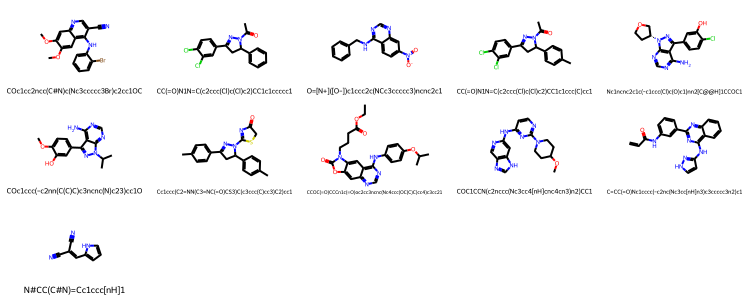

In [40]:
# Draw molecules with SMILES as legends
img = Draw.MolsToGridImage(
    first_elems,
    legends=first_smiles,  # Use SMILES as legends
    molsPerRow=5,
    subImgSize=(150, 100)
)

# Display the grid image
img

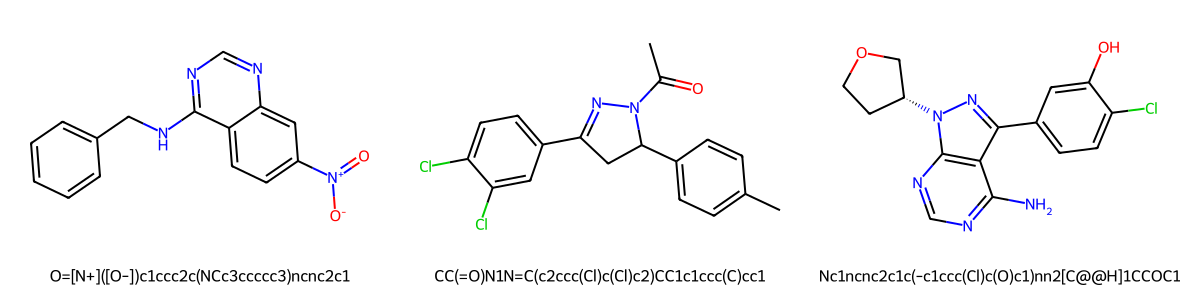

In [41]:
# Extract SMILES for the selected compounds
selected_smiles = [Chem.MolToSmiles(first_elems[i]) for i in [2, 3, 4]]

# Select the specific compounds
three_compounds = [first_elems[i] for i in [2, 3, 4]]

# Draw the molecules with SMILES as legends
img = Draw.MolsToGridImage(
    three_compounds,
    legends=selected_smiles,  # Use SMILES as legends
    molsPerRow=3,             # Set number of molecules per row
    subImgSize=(400, 300))     # Larger sub-image size for higher resolution)

# Display the image
img


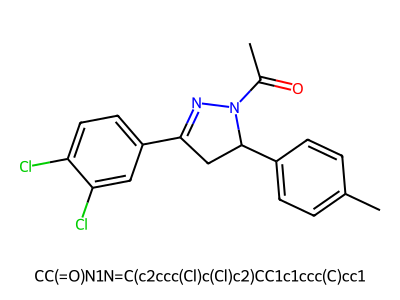

In [42]:
# Select the middle compound and its SMILES
final = first_elems[3]
final_smiles = Chem.MolToSmiles(final)

# Draw the molecule with its SMILES as a legend
img = Draw.MolsToGridImage(
    [final],
    legends=[final_smiles],
    molsPerRow=1,
    subImgSize=(400, 300)
)

# Display the image
img


In [43]:
final_smiles

'CC(=O)N1N=C(c2ccc(Cl)c(Cl)c2)CC1c1ccc(C)cc1'

In [44]:
!pip freeze > requirements.txt
